In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [2]:
# Create a sample dataset with customer annual income, spending score, and age
data = {
    'AnnualIncome': [
        15, 15.5, 16, 16.5, 17, 17.5, 18, 18.5, 19, 19.5, 
        20, 20.5, 21, 21.5, 22, 22.5, 23, 23.5, 24, 24.5, 
        25, 25.5, 26, 26.5, 27, 27.5, 28, 28.5, 29, 29.5, 
        30, 30.5, 31, 31.5, 32, 32.5, 33, 33.5, 34, 34.5, 
        35,   # Normal points
        80, 85, 90  # Outliers
    ],
    'SpendingScore': [
        39, 42, 45, 48, 51, 54, 57, 60, 63, 66,
        69, 72, 75, 78, 81, 84, 87, 90, 93, 96,
        6, 9, 12, 15, 18, 21, 24, 27, 30, 33,
        5, 8, 11, 14, 17, 20, 23, 26, 29, 32,
        56,   # Normal points
        2, 3, 100  # Outliers
    ],
    'Age': [
        20, 20.5, 21, 21.5, 22, 22.5, 23, 23.5, 24, 24.5, 
        25, 25.5, 26, 26.5, 27, 27.5, 28, 28.5, 29, 29.5, 
        30, 30.5, 31, 31.5, 32, 32.5, 33, 33.5, 34, 34.5, 
        35, 35.5, 36, 36.5, 37, 37.5, 38, 38.5, 39, 39.5, 
        40,   # Normal points
        15, 60, 70  # Outliers
    ]
}

df = pd.DataFrame(data)

# Display the first few rows of the dataset
print(df.head())

   AnnualIncome  SpendingScore   Age
0          15.0             39  20.0
1          15.5             42  20.5
2          16.0             45  21.0
3          16.5             48  21.5
4          17.0             51  22.0


### Preprocessing the data
Before applying dimensionality reduction techniques, it is important to preprocess the data by scaling the features. Dimensionality reduction algorithms are sensitive to the scale of the features, so we'll use **StandardScaler** to normalize the data.

In [3]:
# Normalize the data
scaler = StandardScaler()
scaled = scaler.fit_transform(df)

# Convert back to DataFrame for easy handling
df_scaled = pd.DataFrame(scaled, columns=['AnnualIncome', 'SpendingScore','Age'])

print(df_scaled.head())

   AnnualIncome  SpendingScore       Age
0     -0.869761      -0.135877 -1.166678
1     -0.838899      -0.033387 -1.114825
2     -0.808036       0.069103 -1.062973
3     -0.777174       0.171594 -1.011121
4     -0.746311       0.274084 -0.959268


### Implementing PCA
Now you will apply PCA to reduce the dimensionality of the dataset from three to two principal components. PCA will capture most of the variance in the data using fewer dimensions.

In [4]:
# Apply PCA to reduce dimensions from 3 to 2
pca = PCA(n_components=2)
df_pca = pca.fit_transform(scaled)

# Convert back to DataFrame for easy handling
df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
print(df_pca.head())

       PCA1      PCA2
0 -1.324642 -0.590673
1 -1.300977 -0.474300
2 -1.277312 -0.357927
3 -1.253647 -0.241554
4 -1.229982 -0.125181


n_components = 2: This reduces the dataset to two principal components that capture the majority of the variance in the original data.

### Visualizing PCA results
Once you have implemented PCA, visualize the two principal components using a scatter plot. This will help you understand how PCA reduces dimensionality while retaining important information.

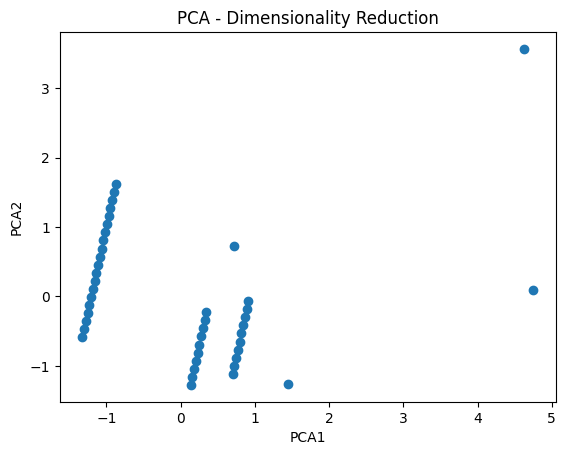

In [5]:
# Plot the PCA components
plt.scatter(df_pca['PCA1'], df_pca['PCA2'])
plt.title('PCA - Dimensionality Reduction')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

The scatter plot will show how PCA reduces the dataset to two dimensions while capturing the most important patterns from the original data.

## Interpreting the PCA Plot

### Overview
This plot shows the result of applying **PCA (Principal Component Analysis)** to your dataset with three original features:
- Annual Income  
- Spending Score  
- Age  

After PCA transformation, the data is reduced from **3 dimensions to 2 dimensions** — represented as **PCA1** and **PCA2**.

---

### How to Interpret the Axes
- **PCA1** (x-axis): The direction that explains the largest variance in your data — it captures the most important pattern across all three features.  
- **PCA2** (y-axis): The second most important direction, orthogonal to PCA1, capturing the next largest variance.

Each data point in the plot represents a customer’s combination of `AnnualIncome`, `SpendingScore`, and `Age`, but projected onto a **2D plane** for visualization.

---

### What the Plot Tells You
- **Cluster-like structures** or **groupings** may suggest customers with similar spending and income behavior.  
- **Outliers** (points far away from the main cluster) represent unusual customers — for example, very high income or extreme spending scores.  
- The spread of points along PCA1 and PCA2 shows how much variation exists in the dataset.

---

### Key Takeaway
> PCA compresses high-dimensional data (3D here) into 2D while preserving as much information as possible.  
> This makes it easier to **visualize**, **detect patterns**, and **identify outliers** in your dataset.


### Implementing t-SNE
Next, apply t-SNE to the scaled dataset. t-SNE is a nonlinear dimensionality reduction technique that is useful for visualizing high-dimensional data and preserving local structures.

In [6]:
# Apply t-SNE to reduce dimensions to 2
tsne = TSNE(n_components=2, perplexity=3, random_state=42)
df_tsne = tsne.fit_transform(scaled)

# Convert the t-SNE result back to a DataFrame
df_tsne = pd.DataFrame(df_tsne, columns=['t-SNE1', 't-SNE2'])
print(df_tsne.head())

      t-SNE1     t-SNE2
0 -24.273661 -75.922829
1 -21.864676 -78.433723
2 -18.210257 -77.322861
3 -14.143458 -77.017899
4  -9.827089 -76.657578


n_components = 2: This reduces the data to two components, preserving the local relationships between data points.

### Visualizing t-SNE results
Now visualize the results of the t-SNE transformation using a scatter plot. This plot will help you understand how t-SNE reveals the structure and clusters in the data by preserving local similarities.

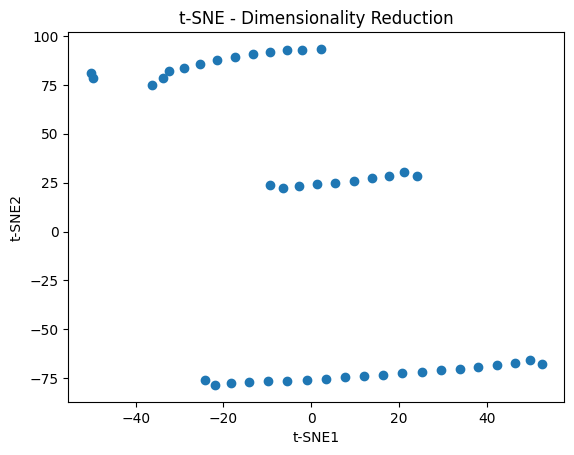

In [7]:
# Plot the t-SNE components
plt.scatter(df_tsne['t-SNE1'], df_tsne['t-SNE2'])
plt.title('t-SNE - Dimensionality Reduction')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.show()

The t-SNE scatter plot will highlight clusters and patterns in the dataset that might not be apparent in higher dimensions.

## Interpreting the t-SNE Plot

### Overview
This plot shows the result of applying **t-SNE (t-distributed Stochastic Neighbor Embedding)** to the same dataset used for PCA.  
It reduces high-dimensional data (3 features) to **2D**, but focuses on **preserving local relationships** rather than global variance.

---

### How t-SNE Differs from PCA
| Aspect | PCA | t-SNE |
|--------|-----|-------|
| Goal | Preserve overall variance and linear structure | Preserve local similarity (neighbors) |
| Type | Linear transformation | Non-linear mapping |
| Good for | Explaining data structure | Visualizing clusters |
| Axes meaning | Each axis is a principal component (linear combination of features) | Axes have no fixed meaning — they’re only for visualization |

---

### How to Read the t-SNE Plot
- **Points close together** → similar customers (similar income/spending/age).  
- **Points far apart** → dissimilar customers.  
- **Clusters or groups** → potential natural groupings in your data.  
- The **absolute position** (e.g., left/right/top/bottom) doesn’t carry direct meaning — what matters is the **relative distance** between points.

---

### Key Insights from Your Plot
- The three clear horizontal bands suggest the dataset may contain **three distinct groups** (for example, low-, medium-, and high-spending customers).  
- A few points may still appear isolated — these could represent **outliers**.  
- Unlike PCA, t-SNE focuses on preserving small-scale relationships, so cluster boundaries are often **more visually separated**.

---

### Key Takeaway
> t-SNE is ideal for **visualizing complex, possibly non-linear relationships** and identifying **clusters**.  
> PCA explains data variance and structure, while t-SNE helps **see the hidden patterns**.


### t-SNE 的 perplexity 参数如何影响聚类形态

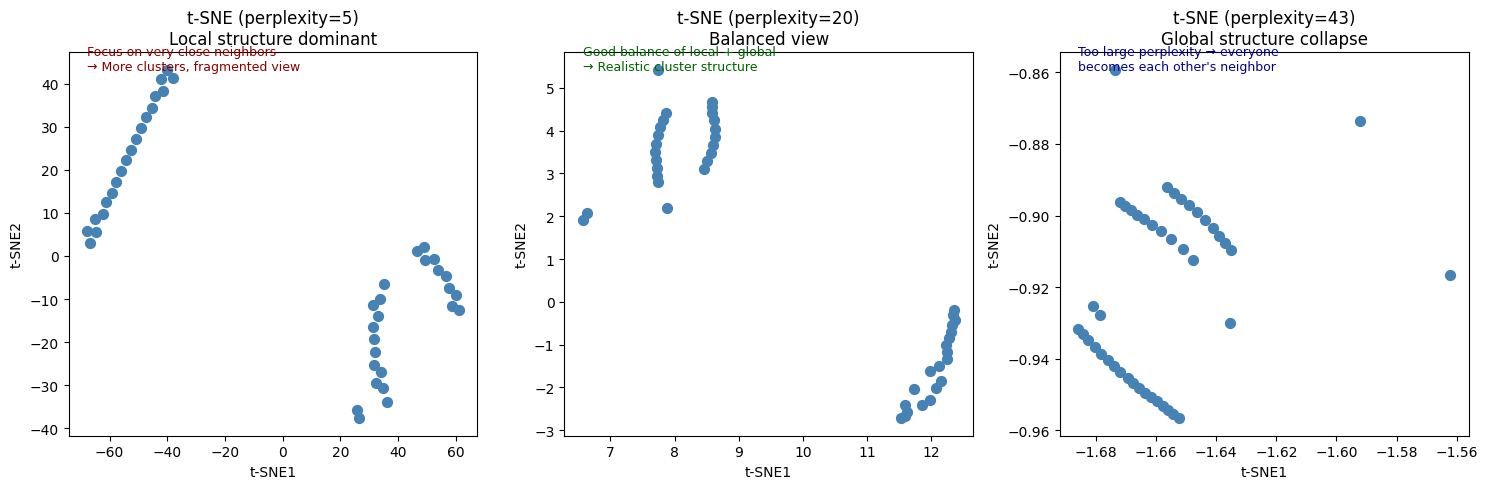

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# 1️⃣ Create the same sample dataset
data = {
    'AnnualIncome': [
        15,15.5,16,16.5,17,17.5,18,18.5,19,19.5,
        20,20.5,21,21.5,22,22.5,23,23.5,24,24.5,
        25,25.5,26,26.5,27,27.5,28,28.5,29,29.5,
        30,30.5,31,31.5,32,32.5,33,33.5,34,34.5,35,
        80,85,90
    ],
    'SpendingScore': [
        39,42,45,48,51,54,57,60,63,66,
        69,72,75,78,81,84,87,90,93,96,
        6,9,12,15,18,21,24,27,30,33,
        5,8,11,14,17,20,23,26,29,32,
        56,2,3,100
    ],
    'Age': [
        20,20.5,21,21.5,22,22.5,23,23.5,24,24.5,
        25,25.5,26,26.5,27,27.5,28,28.5,29,29.5,
        30,30.5,31,31.5,32,32.5,33,33.5,34,34.5,
        35,35.5,36,36.5,37,37.5,38,38.5,39,39.5,40,
        15,60,70
    ]
}
df = pd.DataFrame(data)

# 2️⃣ Normalize features
scaler = StandardScaler()
scaled = scaler.fit_transform(df)

# 3️⃣ Define perplexity values to compare
perplexities = [5, 20, 43]

# 4️⃣ Plot all perplexity settings in one figure
plt.figure(figsize=(15, 5))

for i, p in enumerate(perplexities):
    tsne = TSNE(
        n_components=2,
        perplexity=p,
        random_state=42,
        learning_rate='auto',
        init='pca'
    )
    tsne_result = tsne.fit_transform(scaled)

    # 5️⃣ Subplot for each perplexity
    plt.subplot(1, len(perplexities), i + 1)
    plt.scatter(tsne_result[:, 0], tsne_result[:, 1], s=50, c='steelblue')

    # Add explanatory annotations for each perplexity
    if p == 5:
        plt.title(f"t-SNE (perplexity={p})\nLocal structure dominant")
        plt.text(min(tsne_result[:,0]), max(tsne_result[:,1]),
                 "Focus on very close neighbors\n→ More clusters, fragmented view",
                 fontsize=9, color='darkred')
    elif p == 20:
        plt.title(f"t-SNE (perplexity={p})\nBalanced view")
        plt.text(min(tsne_result[:,0]), max(tsne_result[:,1]),
                 "Good balance of local + global\n→ Realistic cluster structure",
                 fontsize=9, color='darkgreen')
    else:
        plt.title(f"t-SNE (perplexity={p})\nGlobal structure collapse")
        plt.text(min(tsne_result[:,0]), max(tsne_result[:,1]),
                 "Too large perplexity → everyone\nbecomes each other's neighbor",
                 fontsize=9, color='darkblue')

    plt.xlabel("t-SNE1")
    plt.ylabel("t-SNE2")

plt.tight_layout()
plt.show()


- Left (perplexity=5): Local details dominate — the data breaks into small, isolated groups.

- Middle (perplexity=20): Balanced — the structure is smooth but clusters still visible (often best).

- Right (perplexity=43): Global collapse — structure compresses because almost all points are treated as neighbors.